# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання, використовувати sql, а також Tableau! 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому Ви є зараз, показати, що Ви вмі
те робити.

## Робота з Excel файлом
Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`. Так, це Excel файл, і ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [ ]:
!pip install openpyxl

In [1]:
import pandas as pd

#замініть на шлях до файлу на своєму комп`ютері
path_to_file = 'C:/Users/svtom/Python Course/Final Project/Grocery Database.xlsx'

#переглянути листи в Excel файлі
xl = pd.ExcelFile(path_to_file)
xl.sheet_names


df_describe = xl.parse('Fact Summary')
df = pd.read_excel(path_to_file)

В файлі ви знайдете опис колонок і значення.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас цікавить щодо цих даних як співробітника цього бізнесу, який дуже вболіває за його успіх, 
2. код для відповіді на це питання
3. висновки, які Ви зробили з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** 

1. поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float - варто змінити тип) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведеної таблиці (pivot) або її аналога
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)
- _мінімум_ 1 використання тестування статистичних гіпотез. Наприклад, порівняти, чи стат значимо відрізняється певний цікавий бізнесу показник для чоловіків і жінок. Важливо, що найбільш доречно це буде, якщо той показник, який порівнюємо між групами, справді має доволі незначну різницю. Але потренуватись можна і при наявності значної. Питання тут насправді що таке "значна")) І воно залежить від співвідношення розміру середнього і стандартного відхилення.

    В даному мінімум-наборі немає вимоги на використання SQL. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql. 

    Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

2. Розробити систему метрик для цього бізнесу (що нам цікаво вимірювати) і побудувати Tableau репорт відповідно до системи метрик. Опублікувати Tableau репорт на Tableau public і додати посилання на нього в ноутбуці з описом на кшталт "Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням".

По закінченню - завантажте ноутбук на git і додаємо посилання на ноутбук в здачу роботи в Kwiga. 
До речі, з часом, Вам може захотітись доповнити цей ноутбук, коли арсенал Ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

Оскільки набір даних дуже великий і можна зробити дійсно багато, я вирішила зосередитися на асортименті компанії. Тому всі проаналізовані питання в тій чи іншій мірі завжди опираються на даних про товари чи категорії. <br>

**1. Імпорт бібліотек**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

**2. Ознайомлення з даними**

Почати слід зі знайомства з даними.

In [3]:
#Загальні характеристики: розмір, типи даних, огляд перших 10 рядків
print(f'Набір містить {df.shape[0]} рядків та {df.shape[1]} атрибути.')
display(df.dtypes, df.head(10))

Набір містить 50447 рядків та 32 атрибути.


Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
5,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,ThyGrace Romanine lettuce,ThyGrace,100 g,2.81,1,0.01,2.7819,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.33720,0.4215,2.05130
6,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,YUVVO French Bean,YUVVO,260 g,3.28,1,0.01,3.2472,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.31160,0.4920,2.47640
7,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,4,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,ThyGrace Holland potato,ThyGrace,690 g,3.75,1,0.01,3.7125,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.35625,0.5625,2.83125
8,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,0,20,Female,Jakarta,Indonesia,Pet Care,Dog Food & Trat,Lamb pate dog food,Nature's Gift,600 g,5.84,1,0.02,5.7232,21.1974,0.1,23.31714,Cash,BDO Unibank,0.148,0.15,0.702,0.86432,0.8760,4.09968
9,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,1,20,Female,Jakarta,Indonesia,Pet Care,Pet Food,Nutro Beef with vegetables dog food,Nutro,270 g,7.30,1,0.02,7.1540,21.1974,0.1,23.31714,Cash,BDO Unibank,0.076,0.15,0.774,0.55480,1.0950,5.65020


In [4]:
#Перегляд опису атрибутів
df_describe

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


In [5]:
#Перевірка набору на наявність пропущених значень
df.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64




**3. Підготовка даних до роботи**

In [6]:
#Перевірка коректності даних про покупки
df_clean = df.copy()

#Перевіримо вибрані чеки
def amount_checker(receipt_number, dataframe):
    net_bill_amount = round(dataframe[dataframe['Receipt Number'] == receipt_number]['Net Bill Amount'].unique()[0], 4)
    total_amount = round(dataframe[dataframe['Receipt Number'] == receipt_number]['Amount'].sum(), 4)
    
    if net_bill_amount == total_amount:
        print(f"Сума Net Bill Amount у наборі даних дорівнює {net_bill_amount}. Перерахунок дає нам також {total_amount}")
    else:
        print(f"Сума Net Bill Amount у наборі даних не дорівнює загальній сумі Amount для даного чека.")

amount_checker('GIJ00003', df_clean)
amount_checker('GIJ00004', df_clean)
amount_checker('GSW01533', df_clean)


#Підрахунок загальної кількості рядків з розбіжностями
check_amount_by_receipt = df_clean.groupby('Receipt Number').agg({'Net Bill Amount': 'first', 'Amount': 'sum'})
check_amount_by_receipt['Check'] = check_amount_by_receipt['Net Bill Amount'] == check_amount_by_receipt['Amount']

print(f'\nМаємо наступний результат: {check_amount_by_receipt.Check.value_counts()}')

Сума Net Bill Amount у наборі даних не дорівнює загальній сумі Amount для даного чека.
Сума Net Bill Amount у наборі даних не дорівнює загальній сумі Amount для даного чека.
Сума Net Bill Amount у наборі даних дорівнює 74.1664. Перерахунок дає нам також 74.1664

Маємо наступний результат: Check
True     8521
False    4527
Name: count, dtype: int64


Перевірка показала, що не всі дані в наборі є точними. Розбіжності стосуються лише замовлень, які складаються з більше ніж одного товару. Можна було б припустити, що це додаткові оплати за пакування або транспорт, але існують також замовлення з декілкох товарів, у випадку яких немає неточностей. Тому все ж схиляюся до технічних помилок.

Відхилення зустрічаються в третині даних. Такі розбіжності можуть погіршити кінцевий результат аналізу даних, що в результаті може призвести до збитків. Тому найкращим варіантом в цій ситуації буде перерахунок сум в двох колонках - Net Bill Amount та Gross Bill Amount.

In [7]:
#Перерахунок даних
rows_to_update = check_amount_by_receipt[check_amount_by_receipt['Check'] == False]


#Оновимо значення в стовпці 'Net Bill Amount' і 'Gross Bill Amount' для відповідних рядків
for index, row in rows_to_update.iterrows():
    receipt_number = index
    new_amount = row['Amount']
    gst = df_clean.loc[df_clean['Receipt Number'] == receipt_number, 'GST'].iloc[0]
    df_clean.loc[df_clean['Receipt Number'] == receipt_number, 'Net Bill Amount'] = new_amount
    df_clean.loc[df_clean['Receipt Number'] == receipt_number, 'Gross Bill Amount'] = new_amount + (new_amount * gst)


In [8]:
#Повторна перевірка чеків після перерахунку   
amount_checker('GIJ00003', df_clean)
amount_checker('GIJ00004', df_clean)
amount_checker('GSW01533', df_clean)

Сума Net Bill Amount у наборі даних дорівнює 30.7692. Перерахунок дає нам також 30.7692
Сума Net Bill Amount у наборі даних дорівнює 24.2452. Перерахунок дає нам також 24.2452
Сума Net Bill Amount у наборі даних дорівнює 74.1664. Перерахунок дає нам також 74.1664


**4. Аналіз даних**

Що корисного ми можемо взяти з цього набору даних для розвитку нашого бізнесу?



ПИТАННЯ #1: Які категорії товарів приносять найбільший і найменший прибуток компанії?

In [9]:
profit_by_category = df_clean.groupby('Category')['Profit Margin'].sum()
profit_by_category

Category
Bakery & Breakfast           6224.72130
Beauty                       7989.95303
Beverages                    2409.21953
Choco, Snacks, Sweets        2958.05643
Dairy, Chilled & Eggs        2668.73836
Frozen                       9261.11848
Fruit & Vegetable            4388.17980
Health                       1775.48380
Household                    1868.32783
Kitchen & Dining             1611.64675
Meat & Seafood               4166.63054
Mother & Baby                4261.74189
Party Supplies               1651.76802
Pet Care                     4465.25015
Rice & Cooking Essentials    1266.69024
Wines, Beers & Spirits       3653.71160
Name: Profit Margin, dtype: float64

ВИСНОВОК #1: Найбільший прибуток компанії приносять продукти з категорії Frozen, а найменший - Rice & Cooking Essentials

Давайте подивимося на прибуток по категоріях для конкретних країн.

ПИТАННЯ #2: Які категорії товарів є найбільш прибуткові для різних країн?

In [10]:
df_clean.pivot_table(index=['Country'], columns=['Category'], values=['Profit Margin'], aggfunc='sum').style.format('{:.0f}').background_gradient(axis=1)

ВИСНОВОК #2: Закономірність зберігається і для конкретних країн. Набільший прибуток приносять товари з 3 категорій: Frozen, Beauty та Bakery & Breakfast. Найменш популярними є Rice & Cooking Essentials, Kitchen & Dining і Party Supplies. Для отримання точніших рекомендацій погляньмо теж на динаміку прибутку по роках.

ПИТАННЯ #2.1: Яка тенденція прибутку по категоріям стостерігається протягом усього періоду? Чи є категорії, які втрачають свою популярність?

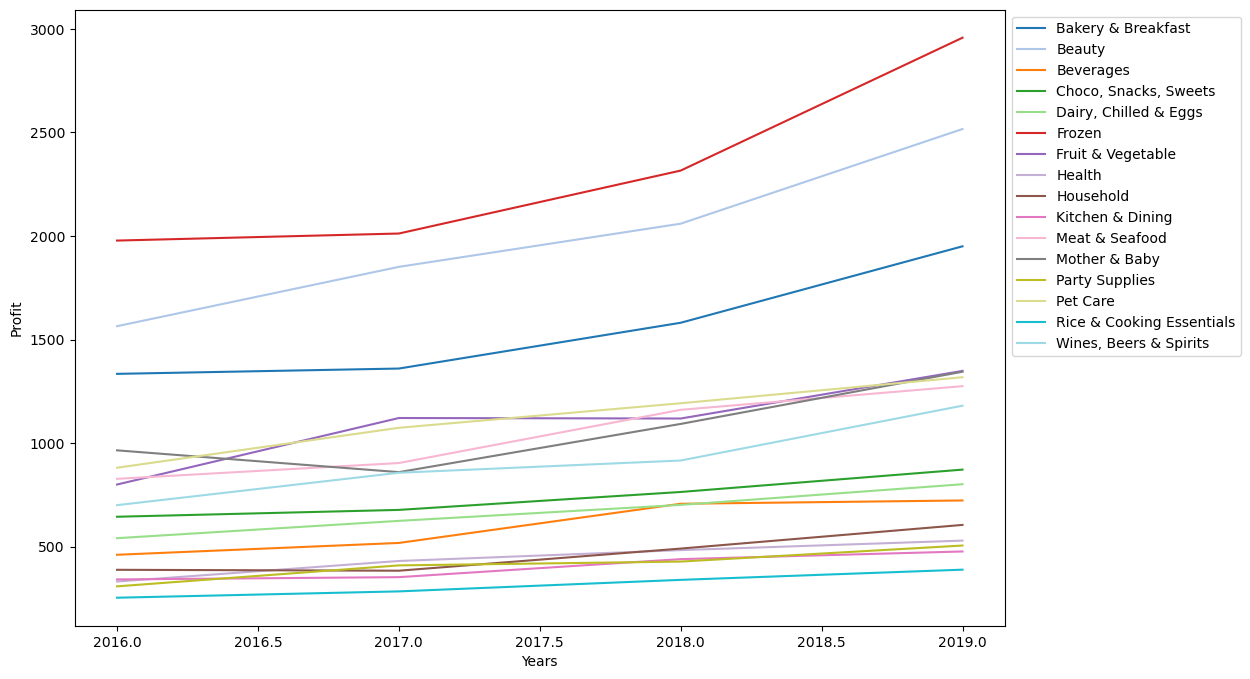

In [11]:
colors = plt.cm.tab20(np.linspace(0, 1, 16))  #tab20 містить 20 різних кольорів

profit_by_category_and_year_pivot = df_clean.pivot_table(index='Year', columns='Category', values='Profit Margin', aggfunc='sum')
ax = profit_by_category_and_year_pivot.fillna(0).plot(figsize=(12, 8), color=colors)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xlabel('Years')
ax.set_ylabel('Profit')

plt.show();

Як ми можемо побачити на графіку, категорії з найкращим прибутком (Frozen, Beauty та Bakery & Breakfast) мають позитивну тенденцію протягом усього періоду. З уваги на те, що прибуток більшості категорій знаходиться на проміжку 0-1000, важко проаналізувати чи прибуток з будь-якої з цих категорій зменшується. Для полегшення аналізу варто трохи змінити графік:

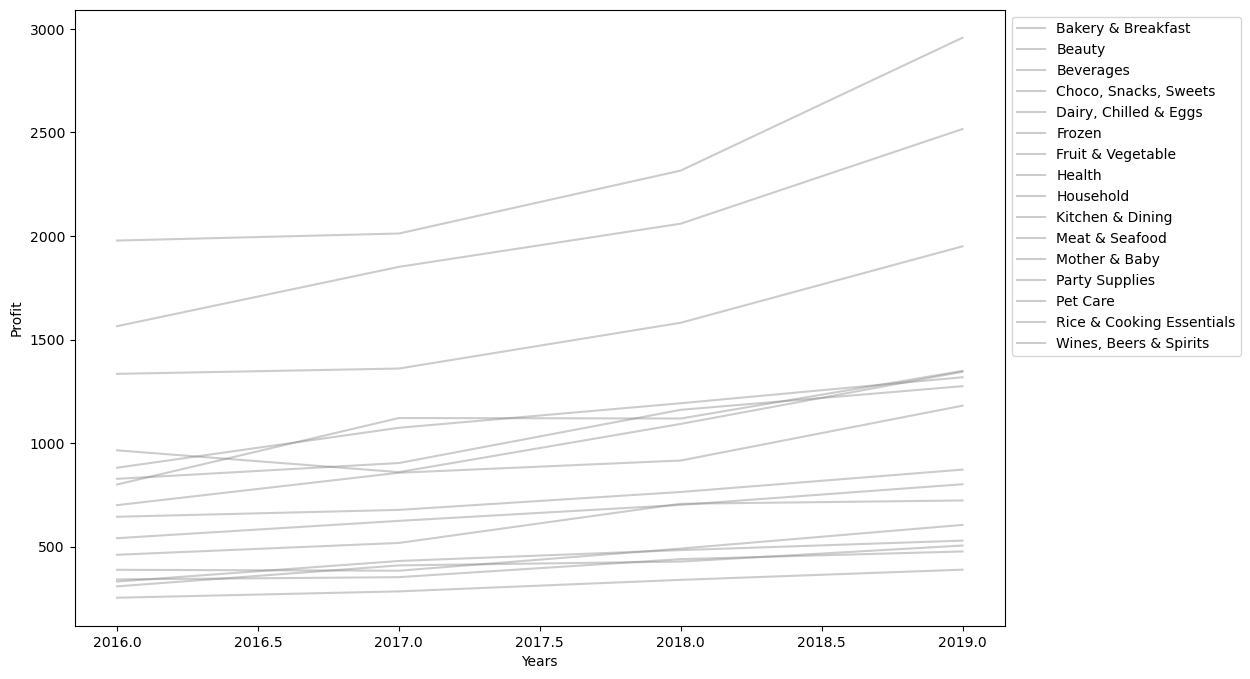

In [12]:
# Визначення функції, яка розраховує тенденцію для кожної лінії
def calculate_trend(data):
    # Розрахунок тенденції, наприклад, за співвідношенням між першим і останнім значеннями
    trend = (data.iloc[-1] - data.iloc[0]) / data.iloc[0]
    return trend < 0
# Виділення ліній зі спадною тенденцією

ax = profit_by_category_and_year_pivot.fillna(0).plot(figsize=(12, 8), color='grey', alpha=0.4)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xlabel('Years')
ax.set_ylabel('Profit')

for line in ax.lines:
    label = line.get_label()
    category_data = profit_by_category_and_year_pivot[label]
    if calculate_trend(category_data):
        line.set_color('red')  # змінюємо колір на червоний для ліній із спадною тенденцією

plt.show();

ВІДПОВІДЬ #2.1: Що ж, всі категорії показують позитивну динаміку протягом усього періоду. Це означає, що не варто відмовлятися від представлених категорій товарів. Для збільшення прибутків варто попрацювати над асортиментом. Перегляд та оновлення асортименту товарів може стати ключовим фактором збільшення доходу.

ПИТАННЯ #3: Скільки продуктів продано по категоріям? І чи є залежність між кількістю проданих товарів і прибутком?

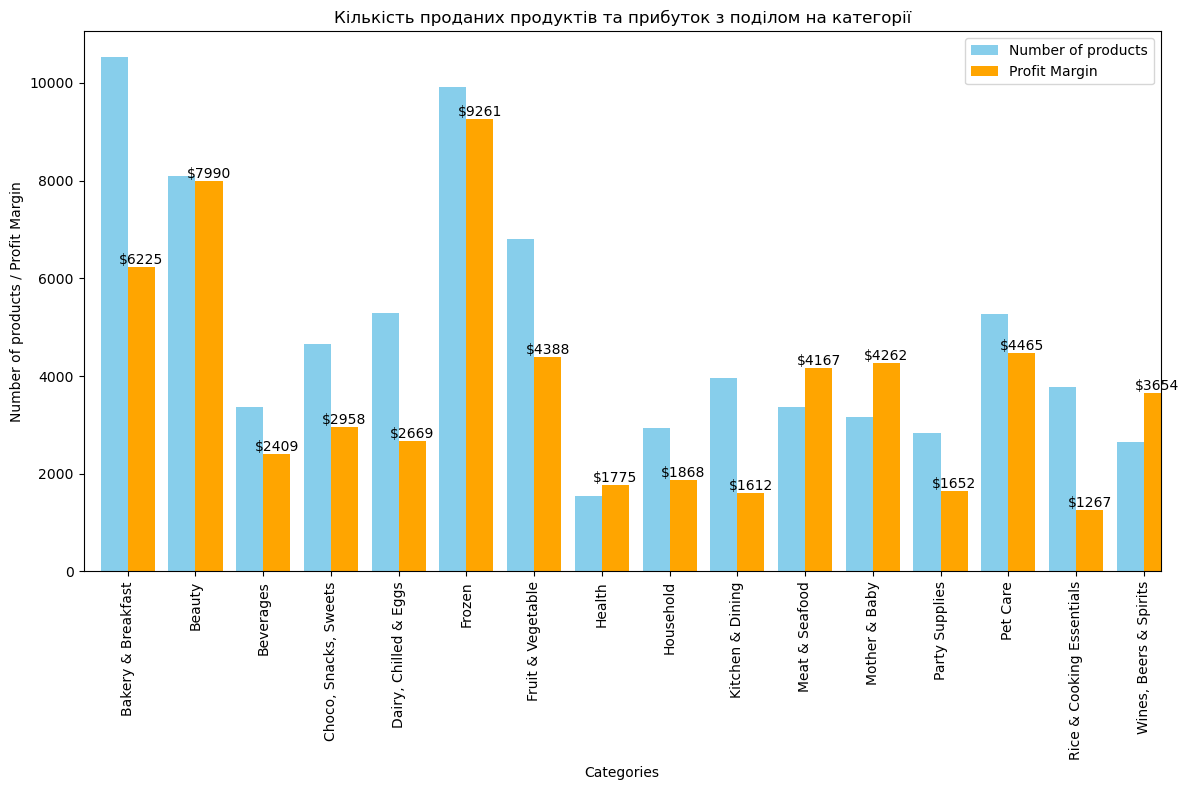

In [13]:
qty_by_category = df_clean.groupby('Category')['QTY'].sum()

x_coordinates = range(len(qty_by_category))

plt.figure(figsize=(12, 8))
qty_by_category.plot(kind='bar', color='skyblue', width=0.4)
plt.bar([x + 0.4 for x in x_coordinates], profit_by_category, color='orange', width=0.4)

plt.xticks([x + 0.2 for x in x_coordinates], qty_by_category.index, rotation=90)
plt.xlabel('Categories')
plt.ylabel('Number of products / Profit Margin')
plt.title('Кількість проданих продуктів та прибуток з поділом на категорії')
plt.legend(['Number of products', 'Profit Margin'], loc='upper right')

for i in range(len(profit_by_category)):
    plt.text(i + 0.4, profit_by_category[i], f"${profit_by_category[i]:.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show();

ВІДПОВІДЬ #3: Кількість проданих продуктів представлена на графіку. Більша кількість проданих товарів не завжди означає кращі прибутки. Наприклад, найбільше продано продуктів з категорії Bakery & Breakfast, але ми бачимо, що ця категорія приносить лише третій за величиною дохід.

Цікаво, що з категорії Health продано найменше товарів, але дохід є більшим ніж Kitchen & Dining чи Household, де кількість проданихх товарів є практично вдвічі більшою. Також варто звернути увагу на категорії Wines, Beers & Spirits, Mother & Baby та Meat & Seafood.

В майбутньому варто зосередити зусилля на цих чотирьох категоріях (Health, Wines, Beers & Spirits, Mother & Baby та Meat & Seafood), адже вони мають великий потенціал. Варто розглянути можливість розширення асортименту товарів та впровадження додаткових послуг або продуктів, які доповнили б основний асортимент (по принципу доповнення: людині, яка купує гриль скоріше за все знадобиться вуголь). Варто також збільшити бюджет на рекламу, адже це допоможе залучити нових клієнтів.

ПИТАННЯ #4: ТОП 15 продуктів, які найчастіше зустрічалися в чеках покупців

In [14]:
df_clean.groupby('Category')['Items'].value_counts().head(15)

Category            Items                         
Bakery & Breakfast  Original wholemeal bread          610
                    vanilla croissant                 355
                    Jumbo 600 Enriched White Bread    320
                    Strawberry Mini Bar               198
                    Multigrain Bread Sliced           196
                    Enriched white bread              194
                    Blueberry Muffin                  192
                    soft wholemeal bread              192
                    Oatmeal squares                   188
                    California Raisin Loaf            187
                    Finegrain Wholemaeal Bread        186
                    Hazelnut Spread                   183
                    Hokkaido Milk Toast Bread         179
                    Red Velvet Muffin                 176
                    Instant Oatmeal refill Pack       176
Name: count, dtype: int64

ВІДПОВІДЬ #4: Найчастіше в чеках клієнтів зв'являються продукти з категорії Bakery & Breakfast. Як ми вже вияснили раніше, найбільш прибутковою категорією є Frozen. Категорія Bakery & Breakfast займає лише третє місце. Це означає, що середній чек Bakery & Breakfast є меншим ніж середній чек Frozen.

ПИТАННЯ #5: Які продукти принесли найбільший дохід?

In [15]:
df_clean.groupby(['Category', 'Items'])['Profit Margin'].sum().sort_values(ascending=False).head(15)

Category                Items                                      
Wines, Beers & Spirits  Ashai Lager Beer                               1764.15428
Fruit & Vegetable       Cascadian farm organic strawberries            1094.56347
Pet Care                Alpo Chicken pate dog food                      995.04248
                        Lamb pate dog food                              915.99124
Dairy, Chilled & Eggs   Fresh Soyamilk                                  845.88239
Pet Care                PEDIGREE Adult complete nuritition dog food     765.48708
Choco, Snacks, Sweets   Sainsbury salted tortilla chips                 697.49070
Frozen                  Minced Pork                                     669.52017
Beauty                  Pro-health cool mint                            663.10610
Frozen                  Nile fish                                       637.64624
Beauty                  Pore pack black                                 630.77395
Frozen                  Crab f

ВІДПОВІДЬ #5: Не дивлячись на те, що найчастіше в чеках зустрічаються продукти з категорії Bakery & Breakfast, жоден з них не представлений у таблиці вище. 

Найбільший дохід приніс продукт Ashai Lager Beer. Це вражаючий результат, якщо звернути увагу на факт, що загальний прихід категорії Wines, Beers & Spirits виносить 3653$.

Подібну ситуацію спостерігаємо з продуктами з категорії Pet Care. Як бачимо, 50% відсотків доходу приносять 3 продукти Alpo Chicken pate dog food, Lamb pate dog food  та PEDIGREE Adult complete nuritition dog food. Загальний дозід з цих продуктів - 2675, коли весь дохід з категорії - це 4465.

Варто збільшити асортимент продуктів, подібних до тих найпопулярніших (наприклад, у різних цінових діапазонах). Це може включати спеціальні акції, рекламні кампанії або нові варіанти продуктів, які вже показали великий успіх. Однозначно варто забезпечити наявність продуктів, що приносять найбільший прибуток. Це допоможе уникнути втрат від недостатньої наявності цих товарів на полицях.

ПИТАННЯ #6: Чи є залежність між доходом від продукту і його собівартістю?

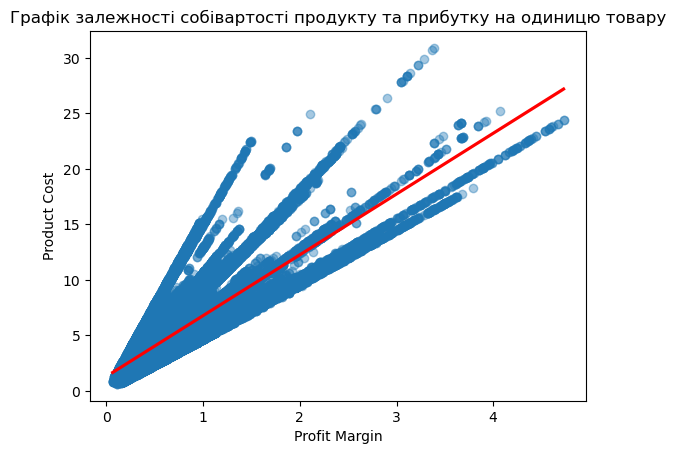

In [16]:
#Profit Margin/QTY дозволить нам отримати прибуток для одиниці продукту
sns.regplot(data=df_clean, x=df_clean['Price'] * df_clean['% Profit Margin'], y=df_clean['Price'] * df_clean['% Product Cost'], scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})
plt.title('Графік залежності собівартості продукту та прибутку на одиницю товару')
plt.xlabel('Profit Margin')
plt.ylabel('Product Cost');

ВІДПОВІДЬ #6: Графік показує, що існує зв'язок між прибутком на одиницю товару та собівартістю продукції. Дані розподілені на кілька окремих "груп" або "діапазонів", що свідчити про існування власного співвідношення між прибутком та собівартістю для різних категорій товарів.

ПИТАННЯ #7: Який середній чек по категоріям з поділом на стать? 

In [17]:
df_clean.groupby(['Category', 'Gender'])['Gross Bill Amount'].mean()

Category                   Gender
Bakery & Breakfast         Female    69.868949
                           Male      68.872527
Beauty                     Female    81.596916
                           Male      76.645669
Beverages                  Female    75.890429
                           Male      76.116439
Choco, Snacks, Sweets      Female    62.729760
                           Male      61.920722
Dairy, Chilled & Eggs      Female    63.375490
                           Male      61.256624
Frozen                     Female    72.856905
                           Male      70.708243
Fruit & Vegetable          Female    64.852819
                           Male      63.309144
Health                     Female    86.901309
                           Male      80.924500
Household                  Female    79.136093
                           Male      75.179130
Kitchen & Dining           Female    70.970777
                           Male      68.262785
Meat & Seafood            

ВІДПОВІДЬ: На перший погляд різниця не є суттєвою, а середній чек чоловіків і жінок дуже схожий.

ПИТАННЯ #8: Чи є статистично значущою різниця між середнім чеком чоловіків та жінок?

Нульова гіпотеза: Середній чек чоловіків не відрізняється від середнього чеку жінок. <br>
Альтернативна гіпотеза: Середній чек чоловіків суттєво відрізняється від середнього чеку жінок.

In [18]:
import pandas as pd
from statsmodels.stats.weightstats import CompareMeans

male_gross_bill = df_clean[df_clean['Gender'] == 'Male']['Gross Bill Amount']
female_gross_bill = df_clean[df_clean['Gender'] == 'Female']['Gross Bill Amount']

z_test = CompareMeans.from_data(male_gross_bill, female_gross_bill).ztest_ind(usevar='unequal')
print(f'{z_test[0]} \n{z_test[1]}') 

alpha = 0.05
if z_test[1] < alpha:
    print("Відхиляємо гіпотезу Н0. Є статистично значима різниця між середніми чеками для чоловіків і жінок.")
else:
    print("Немає статистично значущої різниці між середніми чеками для чоловіків і жінок.")

-3.1325501381679763 
0.0017329482663596388
Відхиляємо гіпотезу Н0. Є статистично значима різниця між середніми чеками для чоловіків і жінок.


ВІДПОВІДЬ #8: Існує статистично значима різниця між середніми чеками для чоловіків і жінок. Це означає, що ми відхиляємо нульову гіпотезу про те, що середній чек для чоловіків дорівнює середньому чеку для жінок, на користь альтернативної гіпотези про їхню відмінність.

ПИТАННЯ #9: Який розподіл вартості покупок в залежності від категорії товарів?

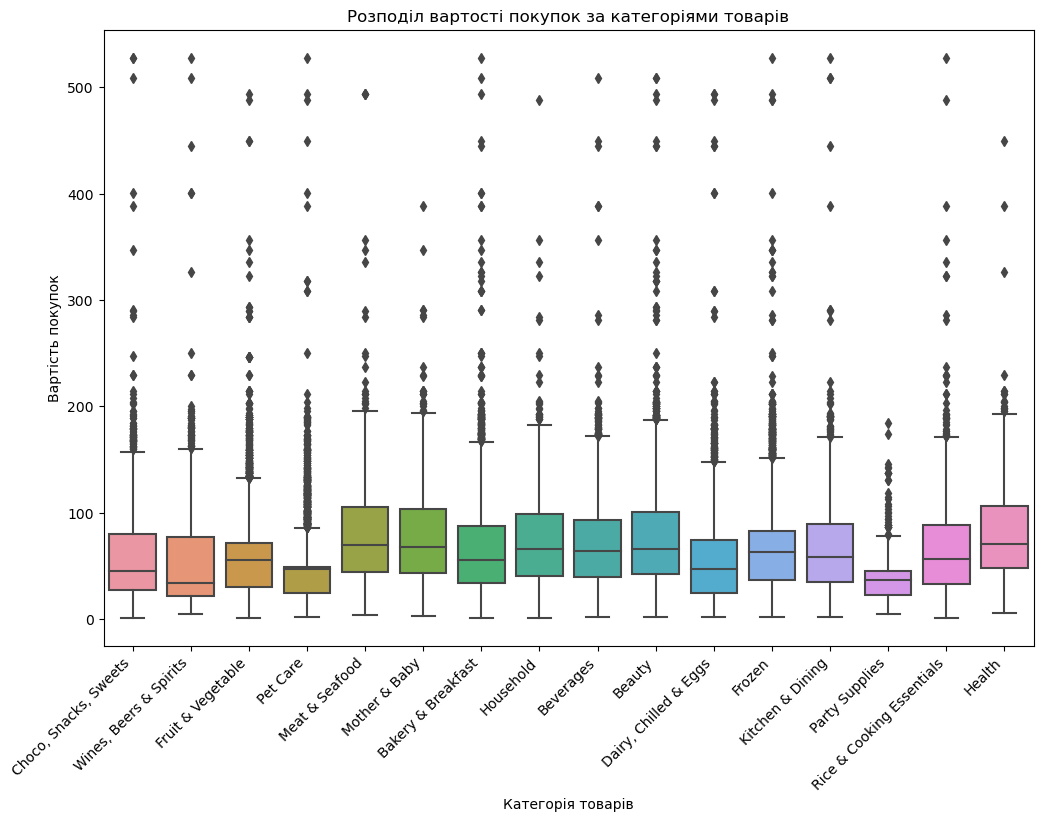

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Net Bill Amount', data=df_clean)

plt.title('Розподіл вартості покупок за категоріями товарів')
plt.xlabel('Категорія товарів')
plt.ylabel('Вартість покупок')
plt.xticks(rotation=45, ha='right')
plt.show()

ВІДПОВІДЬ #9: Графік показує, що розподіл вартості покупок може значно відрізнятися в залежності від категорії товарів, з різною ступеню варіативності в цінах і величиною викидів. Загалом бачимо, що вартість переважної більшості покупок для категорії є схожою. Кожна з категорії має достатню кількість викидів (наприклад, більша вартість покупок перед святями, після переїзду чи вечірки.

ПИТАННЯ #10: Яка динаміка кількості покупок за категоріями товарів в залежності від вікової групи клієнтів?

In [20]:
df_clean.to_excel('df_clean.xlsx', index=False)


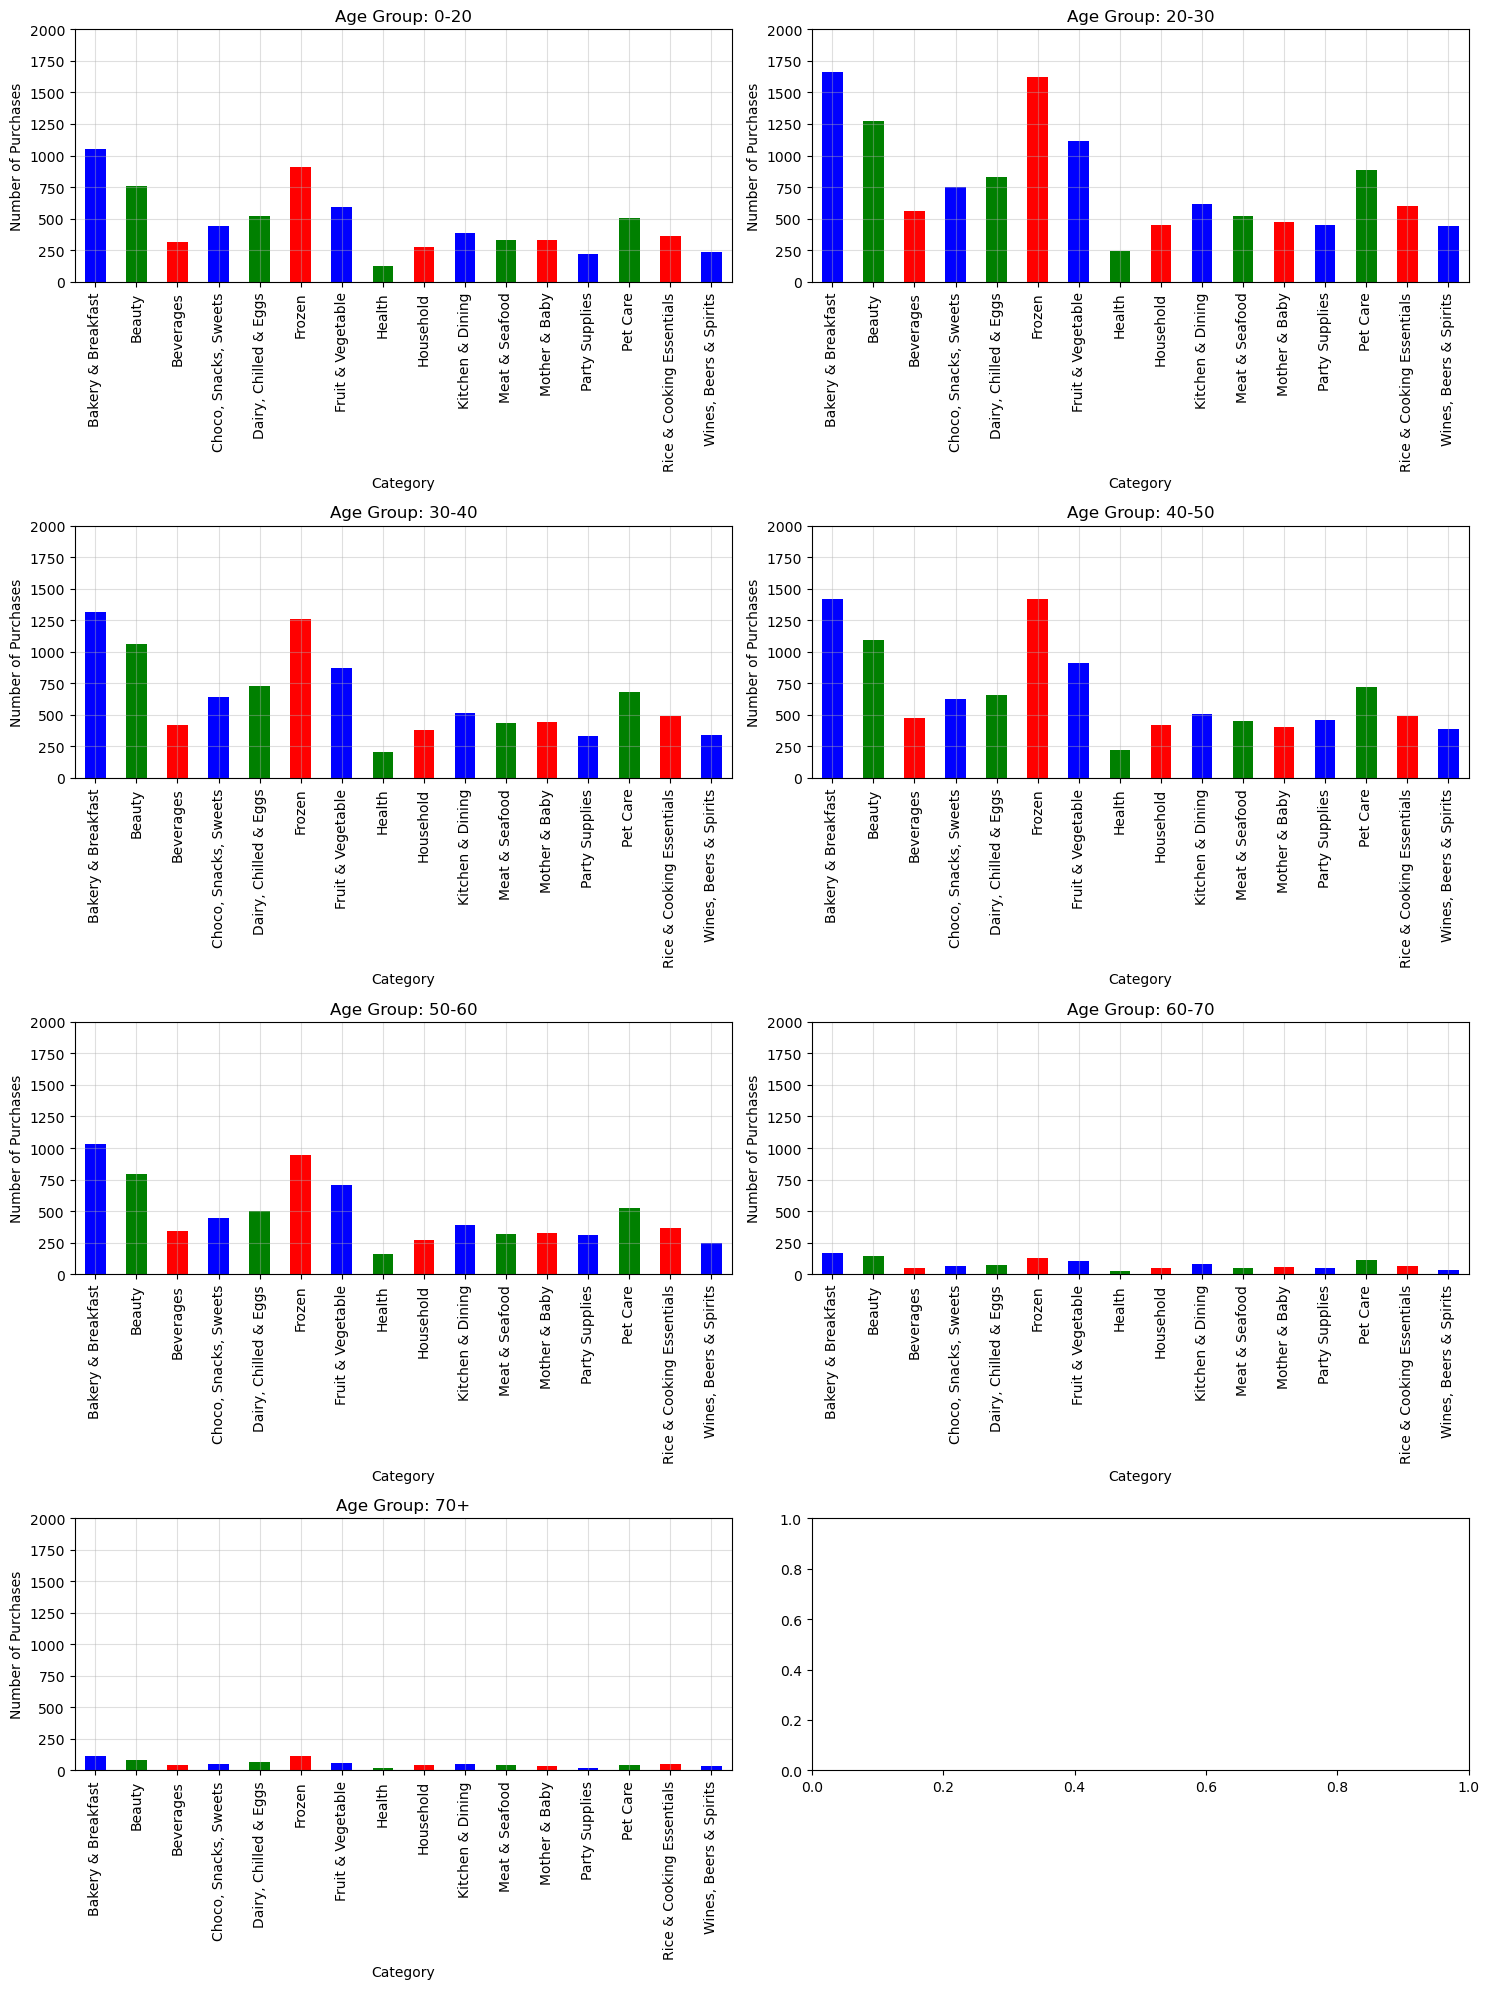

In [21]:
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']

# Додаємо новий стовпець з віковими групами
df_clean['Age Group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)
grouped_data = df_clean.groupby(['Age Group', 'Category']).size().unstack(fill_value=0)

num_rows = (len(labels) + 1) // 2
num_cols = min(len(labels), 2)
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

for i, (group, data) in enumerate(grouped_data.iterrows()):
    row = i // 2
    col = i % 2
    ax = axs[row, col] if num_rows > 1 else axs[col]
    data.plot(kind='bar', ax=ax, color=['blue', 'green', 'red'])
    ax.set_title(f'Age Group: {group}')
    ax.set_xlabel('Category')
    ax.set_ylabel('Number of Purchases')
    ax.grid(True, alpha=0.4)
    ax.set_ylim(0, 2000)

plt.tight_layout()
plt.show()

ВІДПОВІДЬ #10: Начастіше покупки здійснюють люди у віці від 20 до 50 років. Найрідше - від 60. Найпопулярніші категорії не змінюються в залежності від віку.

**МЕТРИКИ**


**Категорія #1: Залучення нових клієнтів** <br>
Ключові метрики: <br>
1. Кількість нових клієнтів (за певний період часу - місяць, квартал, рік)<br>
2. Кількість нових клієнтів з поділом на країни (міста, регіони) <br>
3. Середня вартість першої покупки <br>
<br>


**Категорія #2: Асортимент товарів** <br>
Ключові метрики: <br>
1. Динаміка кількості продажів категорій товарів<br>
2. Відсоток товарів з високою маржою<br>
3. Рентабельність кожної категорії товарів<br>
4. Топ продукти за прибутком<br>
<br>
Вторинні метрики: <br>
1. Кількість товарів в кожній категорії<br>
2. Коефіцієнт товарообороту (відношення кількості всіх товарів до проданих)<br>
3. Відсоток товарів з високими/низькими продажами<br>
4. Кількість акційних товарів<br>
<br>


**Категорія #3: Клієнтська поведінка** <br>
Ключові метрики: <br>
1. Середній чек на клієнта<br>
2. Рівень лояльності клієнтів (наприклад, кількість клієнтів з великою сумою пунктів в системі)<br>
3. Кількість покупок на одного клієнта (за певний період часу - місяць, квартал, рік)<br>
<br>
Вторинні метрики: <br>
1. Поділ клієнтів за віковою групою<br>
2. Поділ клієнтів за статтю<br>
3. Відсоток повторних покупок
<br>
<br>

**Категорія #4: Фінансові показники** <br>
Ключові метрики: <br>
1. Динаміка продажів за період (за певний період часу - місяць, квартал, рік)<br>
2. Кількість товарів з поверненнями та обмінами <br>
3. Обсяг продажів за країнами (міста, регіони)<br>
<br>
Вторинні метрики: <br>
1. Сезонність<br>
2. Кількість продажів в залежності від часу доби<br>
3. Середня кількість товарів у чеку<br>
4. Продажі за типами платежів<br>
